In [8]:
#Installing pandas and seaborn
%pip install pandas seaborn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Loading the dataset
data = pd.read_csv('survey_results_public.csv')

# Displaying the first few rows to understand the data
print(data.head())

   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Emp

Question 1: How does job satisfaction vary between those who program as a hobby and those who contribute to open-source projects?

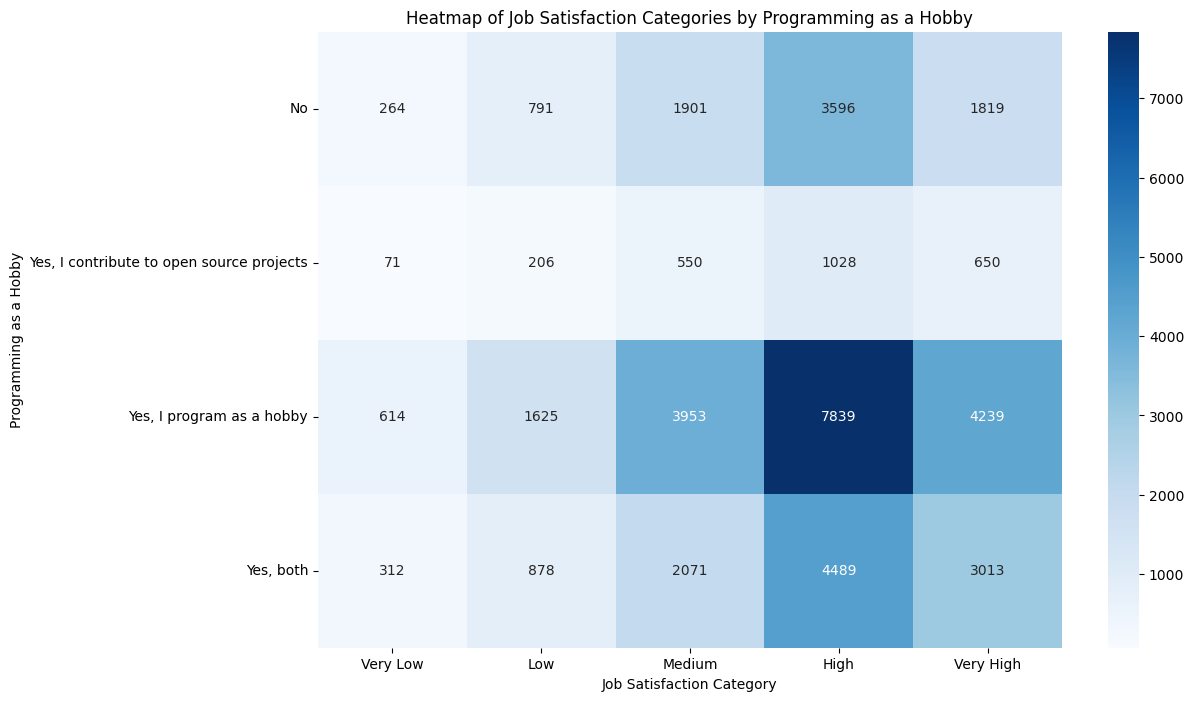

In [9]:

#Load the dataset
df = pd.read_csv('survey_results_public.csv')

# Mapping the 'ProgramHobby' categories to numeric values
hobby_mapping = {
    'Yes, I program as a hobby': 1,
    'Yes, both': 2,
    'No': 0,
    'Yes, I contribute to open source projects': 3
}

# Apply the mapping to create a numeric column
df['ProgramHobbyNumeric'] = df['ProgramHobby'].map(hobby_mapping)

# Ensure 'JobSatisfaction' column is numeric
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'], errors='coerce')

# Filtering out rows with missing values in the relevant columns
df_filtered = df[['ProgramHobbyNumeric', 'JobSatisfaction']].dropna()

# Categorize job satisfaction
bins = [0, 2, 4, 6, 8, 10]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['JobSatisfactionCategory'] = pd.cut(df['JobSatisfaction'], bins=bins, labels=labels)

# Create a heatmap of job satisfaction categories
heatmap_data = pd.crosstab(df['ProgramHobby'], df['JobSatisfactionCategory'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Job Satisfaction Categories by Programming as a Hobby')
plt.xlabel('Job Satisfaction Category')
plt.ylabel('Programming as a Hobby')
plt.savefig('Job_Satisfaction_by_programming_as_hobby.png', bbox_inches='tight')
plt.show()


Question 2: How does the frequency of working from home impact employee job satisfaction?

Unique values in 'HomeRemote':
[nan 'More than half, but not all, the time'
 'Less than half the time, but at least one day each week' 'Never'
 "All or almost all the time (I'm full-time remote)" "It's complicated"
 'A few days each month' 'About half the time']


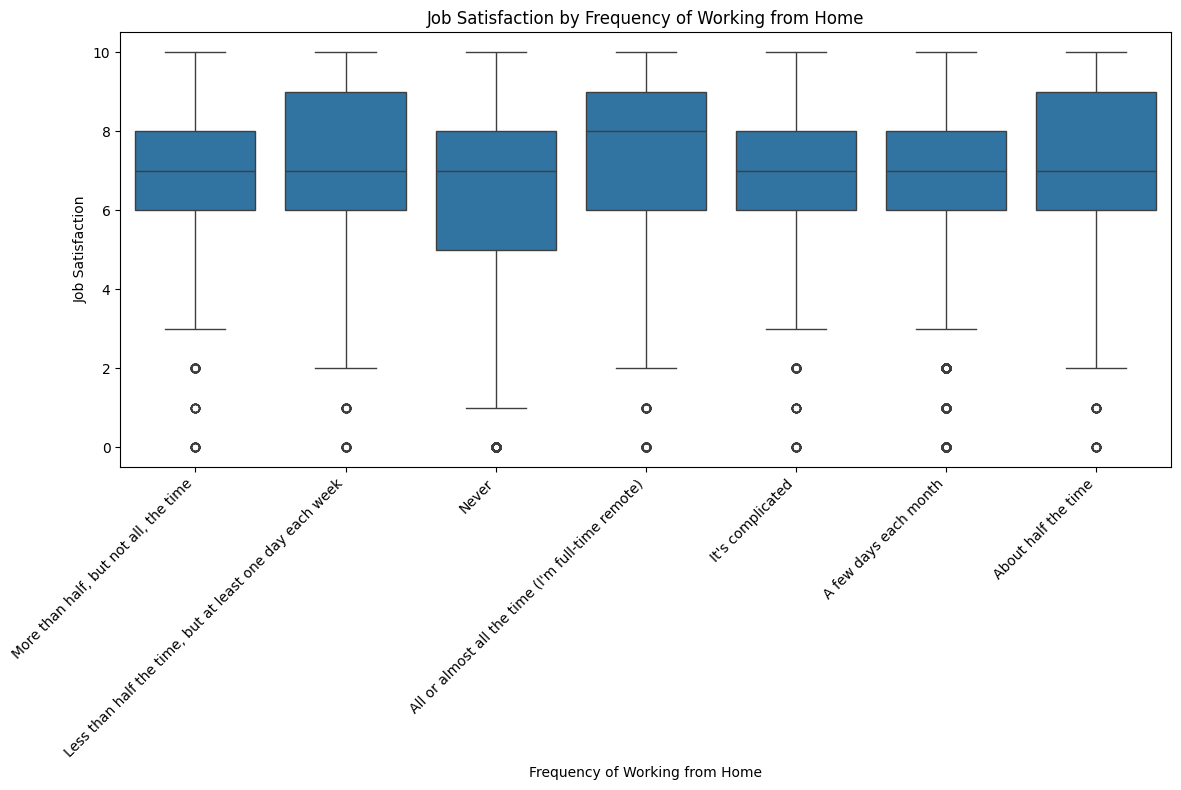

In [10]:

# Check the unique values in the 'HomeRemote' column
unique_values = df['HomeRemote'].unique()
print("Unique values in 'HomeRemote':")
print(unique_values)

# Mapping for home remote frequencies
home_remote_mapping = {
    'Never': 0,
    'Less than half the time, but at least one day each week': 1,
    'A few days each month': 2,
    'About half the time': 3,
    'More than half, but not all, the time': 4,
    'All or almost all the time (I\'m full-time remote)': 5,
    'It\'s complicated': 6
}

# Converting 'HomeRemote' column to numeric values
df['HomeRemoteNumeric'] = df['HomeRemote'].map(home_remote_mapping)

# Drop rows with missing values in the relevant columns
df_filtered = df[['HomeRemoteNumeric', 'JobSatisfaction']].dropna()


# Box plot to visualize job satisfaction by home remote frequency
plt.figure(figsize=(12, 8))
sns.boxplot(x='HomeRemote', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction by Frequency of Working from Home')
plt.xlabel('Frequency of Working from Home')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Job_Satisfaction_by_Home_Remote_Frequency.png', bbox_inches='tight')
plt.show()

Question 3: How is job satisfaction distributed around the world?

                 Country  JobSatisfaction
93                 Libya             10.0
97                 Macau             10.0
6                 Angola              9.0
181                Yemen              9.0
7               Anguilla              9.0
..                   ...              ...
150              Somalia              2.0
103  Martinique (French)              1.5
54                  Fiji              0.0
4         American Samoa              0.0
141          Saint Lucia              0.0

[185 rows x 2 columns]


<ipython-input-12-314cc7f6d2ac>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='JobSatisfaction', data=country_satisfaction, palette='viridis')


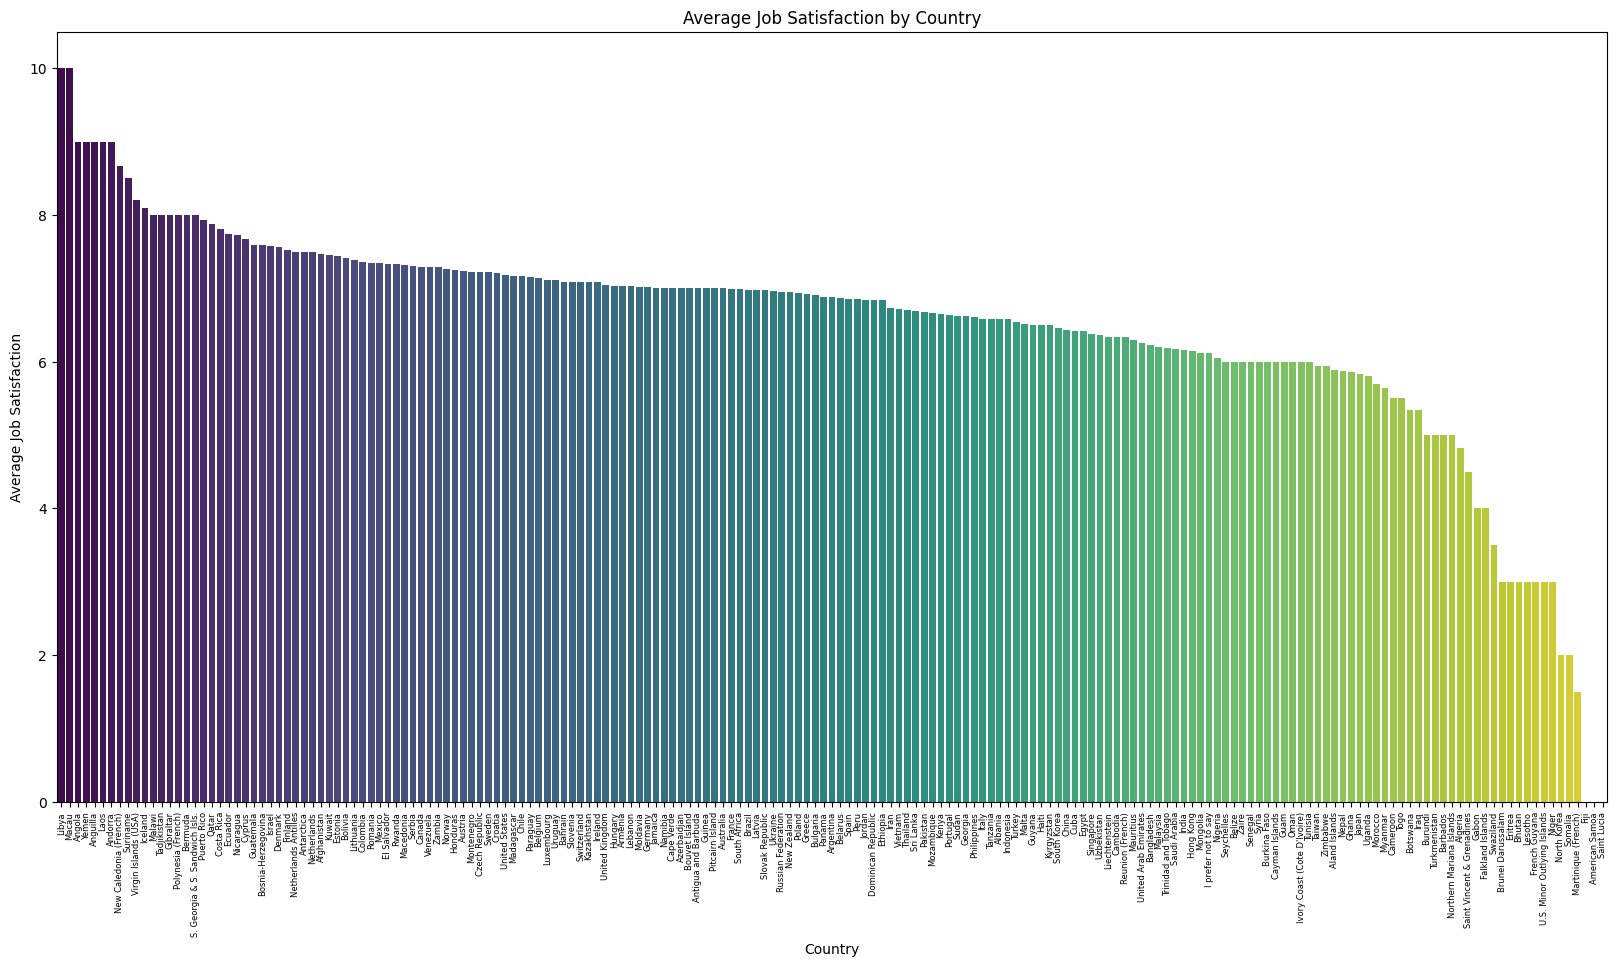

In [12]:
# Filter relevant columns
df_filtered = df[['Country', 'JobSatisfaction']].dropna()

# Check unique values for 'Country' to understand the data
df_filtered['Country'].value_counts()

# Drop rows where 'JobSatisfaction' is NA 
df_filtered = df_filtered.dropna(subset=['JobSatisfaction'])

# Calculate average job satisfaction by country
country_satisfaction =df_filtered.groupby('Country')['JobSatisfaction'].mean().reset_index()

# Sort countries by average job satisfaction
country_satisfaction = country_satisfaction.sort_values(by='JobSatisfaction', ascending=False)

print(country_satisfaction)

plt.figure(figsize=(20, 10))

# Create the bar plot
sns.barplot(x='Country', y='JobSatisfaction', data=country_satisfaction, palette='viridis')
plt.title('Average Job Satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.savefig('Job_Satisfaction_country.png', bbox_inches='tight')
plt.show()